# Applied Markov Processes | Limit Theorems

## Introduction

Markov processes are stochastic processes where the future state depends only on the current state, not on the past history. This property is known as the **Markov property** or **memorylessness**.

## Key Concepts

### Markov Property
A process $\{X_n\}$ is a Markov process if:
$$P(X_{n+1} = j | X_n = i, X_{n-1}, \ldots, X_0) = P(X_{n+1} = j | X_n = i)$$

### Transition Matrix
For a discrete-state Markov chain, transitions are governed by a transition matrix $P$ where:
- $P_{ij}$ = probability of transitioning from state $i$ to state $j$
- Each row sums to 1

### Limit Theorems

#### 1. **Stationary Distribution**
A probability distribution $\pi$ is stationary if $\pi = \pi P$

#### 2. **Convergence Theorem**
For irreducible and aperiodic Markov chains, the n-step transition probabilities converge to the stationary distribution as $n \to \infty$

#### 3. **Ergodic Theorem**
Long-run average behavior converges to expectations under the stationary distribution

## Applications
- Weather prediction models
- Queue systems
- Financial modeling
- Population dynamics
- PageRank algorithms

---

**Next:** Implementation and numerical examples

In [21]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import interact, IntSlider


# Generate Random Variables 

This generates a random value, in this case a random value distributed according to $\mathcal{N}(2,10)$:

In [5]:
print(np.random.normal(2, 10))

-6.085326280836295


In [6]:
#generate 10 random variables from a normal distribution with mean 2 and standard deviation 10
print(np.random.normal(2, 10, 10))

[ -1.77119249  -0.98728543  -3.1355966    6.72600932   0.86806429
 -15.85765447  16.3727473   -0.80422247  -7.66519137  14.04029589]


In this demonstration, we'll want to generate random values for the sum
$$
S_n = \sum_{i=1}^n X_i^2.
$$
Thus we have first to generate $n$ individual random values ,compute the power of each, then add them. Here we use $n=5$:

In [7]:
x=np.random.normal(2,10,5)
print(x)
S_n = np.sum(x**2)
print(S_n)

[  3.31251775 -13.06296909   6.99219121  14.91844339  -3.79021062]
467.43032297941335


## Law of large numbers

To illustrate the law of large numbers, we need to generate a sample of many sample means to find its distribution. Here we look at
$$
\frac{S_n}{n}=\frac{1}{n}\sum_{i=1}^n X_i^2
$$
with $n=10,50$ and $100$, and $X_i\sim\mathcal{N}(2,10)$. The sample size will be $L=10000$.

Sample means computed for n values: [10, 50, 75]
Number of samples per n: 50000


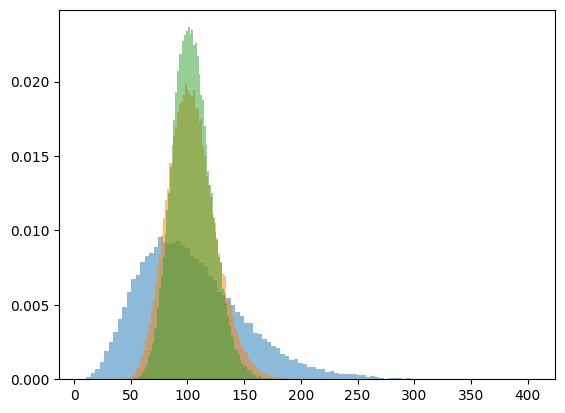

In [18]:
nvals = [10, 50, 75]
L = 50000
sample_means = np.zeros([len(nvals), L])

for k in range(len(nvals)):
    n = nvals[k]
    for j in range(L):
        x = np.random.normal(2, 10, n)
        sample_means[k, j] = np.sum(x**2) / n

print("Sample means computed for n values:", nvals)
print("Number of samples per n:", L)
plt.hist(sample_means[0,:], 100, density=True, alpha=0.5)
plt.hist(sample_means[1,:], 100, density=True, alpha=0.5)
plt.hist(sample_means[2,:], 100, density=True, alpha=0.5)
plt.show()

## Central Limit Theorem

To illustrate the central limit theorem, the code is similar. The only difference is that we look at a different rescaling of the sum of RVs. Moreover, we'll look at a sum of Bernoulli RVs instead of Gaussian RVs. Recall that the mean of $\textrm{Bern}(p)$ is $\mu=p$ while its variance is $\sigma^2=p(1-p)$.

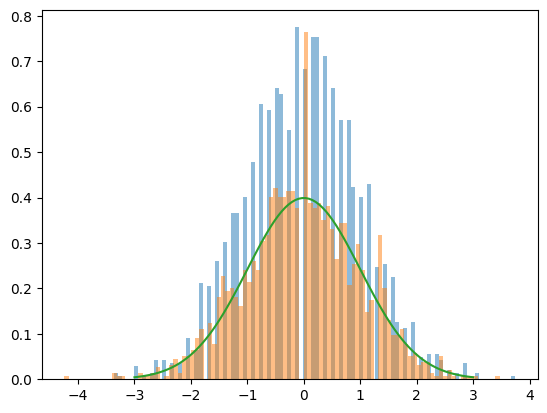

In [19]:
p = 0.4
nvals = [250, 700]
L = 2000
sample = np.zeros([len(nvals), L])

for k in range(len(nvals)):
    n = nvals[k]

    for j in range(L):
        vars = np.random.binomial(1, p, n)
        sample[k, j] = (np.sum(vars) - n*p)/np.sqrt(n)/np.sqrt(p*(1-p))

plt.hist(sample[0, :], 100, density=True, alpha=0.5)
plt.hist(sample[1, :], 100, density=True, alpha=0.5)
axes=np.linspace(-3,3,100)
plt.plot(axes, norm(0,1).pdf(axes))
plt.show()

Change the values of $n$: you'll see a slow convergence towards $\mathcal{N}(0,1)$ by increasing $n$.

In [23]:
def plot_clt_convergence(n_value):
    """Plot CLT convergence for a given n value"""
    sample_clt = np.zeros(L)
    
    for j in range(L):
        vars = np.random.binomial(1, p, n_value)
        sample_clt[j] = (np.sum(vars) - n_value*p) / np.sqrt(n_value) / np.sqrt(p*(1-p))
    
    plt.figure(figsize=(10, 5))
    plt.hist(sample_clt, 100, density=True, alpha=0.6, label=f'n={n_value}')
    plt.plot(axes, norm(0,1).pdf(axes), 'r-', linewidth=2, label='N(0,1)')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Central Limit Theorem - Convergence with n={n_value}')
    plt.legend()
    plt.show()

interact(plot_clt_convergence, n_value=IntSlider(min=50, max=2000, step=50, value=250))

interactive(children=(IntSlider(value=250, description='n_value', max=2000, min=50, step=50), Output()), _dom_…

<function __main__.plot_clt_convergence(n_value)>

In [ ]:
git add nom_du_notebook.ipynb
git commit -m "Ajout: nouveau notebook sur les processus de Markov"
git push